## Simple Linear Regression Exercise that involves use of car insurance data.

We'll build a simple linear regression model using the number of car insurance claims to predict the amount paid out from the number of Swedish car insurance claims.

In [1]:
import pandas as pd
import matplotlib.pyplot as plot
import statsmodels.api as stats
import numpy as np

### Loading Our Data

Our car insurance dataset is in csv form. We'll load and convert it to a pandas DataFrame.

In [2]:
insurance_df = pd.read_csv('auto_insurance_sweden.csv')

In [3]:
insurance_df.shape

(63, 2)

In [4]:
insurance_df.head()

,claims,payment
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


Here we see we have two columns: claims and payment, and that we have 63 observations in our dataset. 

As we want to predict the payment, this is our target variable. The claims column is our independent variable. 

### Visualisation of the Data

We can take a look at our data by plotting the two columns against each other in a scatter plot using the matplotlib package.

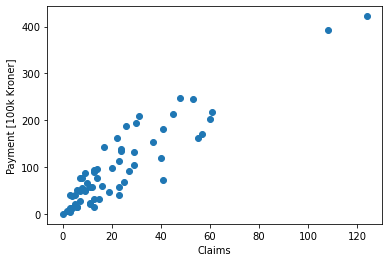

In [5]:
plot.scatter(insurance_df.claims, insurance_df.payment)
plot.xlabel('Claims')
plot.ylabel('Payment [100k Kroner]')
plot.show()

We can see that the data looks broadly linear and a linear regression should be appropriate for this data.

### Fitting the Linear Regression Model

To fit the model using statsmodels we first separate our target variable (Y) and independent variables (X).

statsmodels by default fits models without an intercept which can be useful if we know that our model should pass through zero. Here however we want to fit an intercept as well as a slope so must add in a constant term using the function [stats.add_constant](https://www.statsmodels.org/stable/generated/statsmodels.tools.tools.add_constant.html) (This column is added to our X column as it is used when solving OLS problems with matrix algebra).

In [5]:
Y_insurance = insurance_df.payment
X_insurance = stats.add_constant(insurance_df['claims'])

We then create an instance of the class [stats.OLS](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html), which encompasses our Ordinary Least Squares algorithm, with our training data. We fit the model using the [.fit()](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.fit.html#statsmodels.regression.linear_model.OLS.fit) method, which returns a results class that we call here results_insurance.

In [7]:
model_insurance = stats.OLS(Y_insurance, X_insurance)
results_insurance = model_insurance.fit()

In [8]:
## The results of our model can be acccessed as follows
print(results_insurance.summary())

                            OLS Regression Results                            
Dep. Variable:                payment   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     305.0
Date:                Wed, 02 Nov 2022   Prob (F-statistic):           2.05e-25
Time:                        09:19:20   Log-Likelihood:                -314.04
No. Observations:                  63   AIC:                             632.1
Df Residuals:                      61   BIC:                             636.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.9945      6.368      3.140      0.0

We can extract explicitly our parameter values for the intercept $\theta_{0}$ and slope $\theta_{1}$ using the attribute [.params](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.html#statsmodels.regression.linear_model.RegressionResults) and the sum of square residuals using the property .ssr. Both of these are attributes of the results class: results_insurance.

In [10]:
intercept_insurance = results_insurance.params[0]
claims_coeff = results_insurance.params[1]
ssr_insurance = results_insurance.ssr

print('The intercept value is {:.3f}'.format(intercept_insurance))
print('The coefficient (slope) for the claims independent variable is {:.3f}'.format(claims_coeff))
print('The sum of square residuals is {:.1f}'.format(ssr_insurance))

The intercept value is 19.994
The coefficient (slope) for the claims independent variable is 3.414
The sum of square residuals is 78796.7


In [12]:
print('Our simple regression equation will be Y = {:.2f}'.format(intercept_insurance) + ' + {:.2f}'.format(claims_coeff) +'x')

Our simple regression equation will be Y = 19.99 + 3.41x


### Plotting Results
We can also plot our fitted model using matplotlib. We use our model parameters found above to produce our best fit line of the form $y=\theta_{0}+\theta_{1}x$. Here we create a regular array of X-values, called x_synthetic, with values spanning the range of our observed X-values. We can use this to visualise our line of best fit by calculating the predicted values for these X-values and plotting the subsequent line.

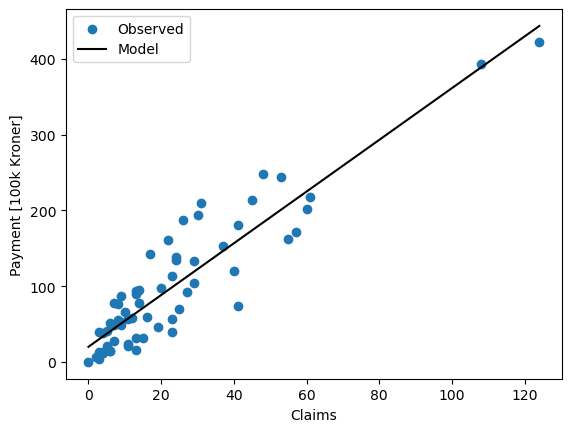

In [14]:
## Plotting observed data points from the original data set
plot.scatter(insurance_df.claims, insurance_df.payment, label='Observed')

## Plotting the line of best fit that will be compared next to the observed data points
x_synthetic = np.linspace(0,insurance_df.claims.max(), 50) #generates an artificial array of 50 x-values evenly spaced between 0 and the maximum value of the claims column.
y_pred_insurance = claims_coeff*x_synthetic + intercept_insurance
plot.plot(x_synthetic, y_pred_insurance, color='k', ls='solid', label='Model')
plot.xlabel('Claims')
plot.ylabel('Payment [100k Kroner]')
plot.legend()
plot.show()

We can see that our best fit line well describes the trend of the data.